In [5]:
using StatsPlots, CSV, DataFrames
gr(size=(600,400))

Plots.GRBackend()

## Figure 3

I successfully replicated these results without too much trouble. Though it did take a while to get my approach performant enough to handle graphs larger Zollman's (neccessary for real communities). My code currently can do these kinds of simulations for graph size ~100 (takes around 30s), though there are still possible optimizations that could make this go a bit faster. My main idea here as Int64 addition is a significant fraction of them is switching to UInt32, for example. 

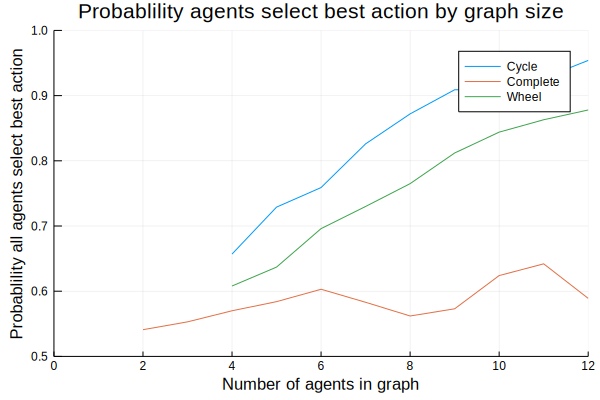

In [13]:
@df CSV.read("figure3-data.csv") plot(
    :Size,
    [:Cycle :Complete :Wheel],
    title="Probablility agents select best action by graph size",
    xlims = (0,12),
    xlabel = "Number of agents in graph",
    ylabel = "Probablility all agents select best action",
    ylims = (0.5,1)
)

## Figure 4

I successfully replicated these results. I used [this enumeration of isomporphic graphs](http://users.cecs.anu.edu.au/~bdm/data/graphs.html) to ensure I don't repeat simulations on identical graphs, though I think Zollman just computes all possible permutations. 

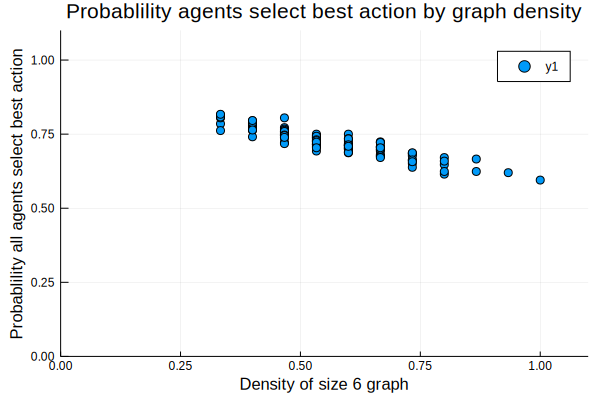

In [7]:
@df CSV.read("figure4-data.csv") scatter(
    :Density,
    :Probability,
    title="Probablility agents select best action by graph density",
    xlims = (0,1.1),
    xlabel = "Density of size 6 graph",
    ylabel = "Probablility all agents select best action",
    ylims = (0,1.1)
)

## Figure 6

I didn't see the same effect Zollman found here where for larger maximum alpha, beta values leads to a decrease probabilitiy of agreement on the complete and cycle graphs. At lower values, I see a gradual increase up until 2000, at which point the values appear to remain high. Zollman, by contrast, saw a decrease that began around 3000 and continued to drop until the probability hit 0.8 at 10000 for cycle graphs.

I haven't completely ruled out some sort of bug in my code, but because I've successfully replicated the other results, I'm starting to get a bit skeptical that my code is the problem here as these simulations use the same exact codepaths as the others. Though there could be some strange case of numerical instability that I want to check for.

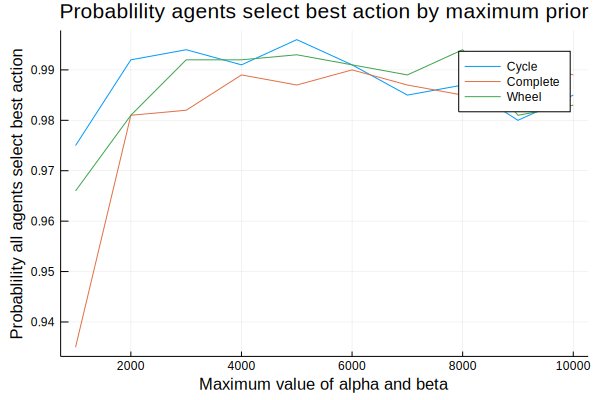

In [8]:
@df CSV.read("figure6-data.csv") plot(
    :MaxPrior,
    [:Cycle :Complete :Wheel],
    title="Probablility agents select best action by maximum prior",
    xlabel = "Maximum value of alpha and beta",
    ylabel = "Probablility all agents select best action",
)

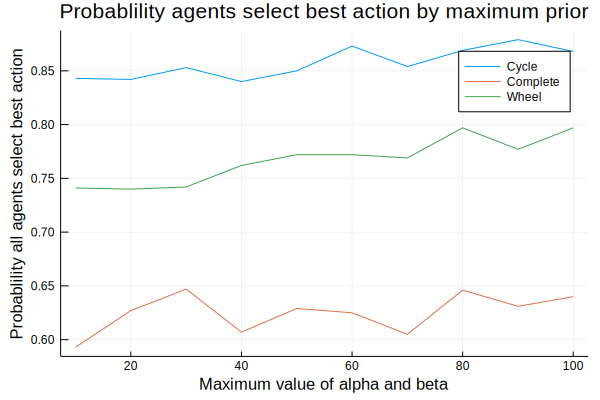

In [9]:
@df CSV.read("figure6_small-data.csv") plot(
    :MaxPrior,
    [:Cycle :Complete :Wheel],
    title="Probablility agents select best action by maximum prior",
    xlabel = "Maximum value of alpha and beta",
    ylabel = "Probablility all agents select best action",
)

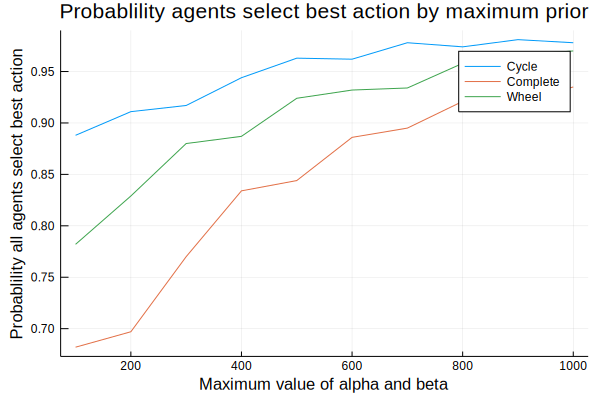

In [10]:
@df CSV.read("figure6_med-data.csv") plot(
    :MaxPrior,
    [:Cycle :Complete :Wheel],
    title="Probablility agents select best action by maximum prior",
    xlabel = "Maximum value of alpha and beta",
    ylabel = "Probablility all agents select best action",
)

Methods of assessing convergance

Original: all or nothing

Multiply ground truth times propotion of agents that converged

Multiply ground truth * average expected 